#**Heart Disease Prediction: A Comparative Study**

##**Author: Belen Berhanu**

**Objective:** To build an end-to-end pipeline that predicts heart disease using two distinct approches.

**Approaches:** Logstic regression and Decision tree

**The Learning Journey:** In this notebook, I will document how I handle raw data, build a robust pipeline to avoid data leakage, and export the final "intelligence" for use in a web application

#**What Are this Two Models?**

##**1. Logistic Regression (The "Weight" Balancer)**

This is a stastical model that function like a scale. It looks at all the health factors (Age, Cholesterol, BP) and assigns a weight or importance to each one.

**How it works:** It adds up all the weighted factors to calculate a single score. It then pushes that score through a special curve (the Sigmoid curve) to give a probability between 0 and 1.

**The Prediction:**  If the probability is higher than 0.5 (50%), it predicts "Heart Disease."

**Simple Analogy:** Like a points system. +10 points for high cholesterol, +5 for age, -2 for exercise. If you have more than 50 points, you are "at risk."

##**2. Decision Trees (The "Flowchart" Doctor)**

This is a logic based model as a game of multiple sucessive questions.It doesn't look at everything at once.It asks one question at a time to narrow down the truth.

**How it works:** It starts at the top with the most important question.

e.g. "Is Chest Pain present?" , based on the Yes or No answer, It moves down to the next branch "Is age > 50?"

**The Prediction:** It keeps splitting the data until it reaches a "leaf" at the bottom, which gives the final diagnosis.

**Simple Analogy:** A medical flowchart. Start at Chest Pain $\rightarrow$ If Yes, check Blood Pressure $\rightarrow$ If High, Heart Disease.

In [241]:
# Environment Setup

import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [242]:
# Data Loading

Data = pd.read_csv("/content/heart_disease_uci.csv")

In [243]:
Data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [244]:
# Data cleaning
# Handling missing values(imputer)
print("Missing values before cleaning:\n", Data.isnull().sum())
Data.dtypes

# Separate numeric and categorical columns
num_cols = Data.select_dtypes(include='number')
cat_cols = Data.select_dtypes(exclude='number')

# Fill numeric columns with median
Data[num_cols.columns] = num_cols.fillna(num_cols.median())

# Fill categorical columns with mode
Data[cat_cols.columns] = cat_cols.fillna(cat_cols.mode().iloc[0])

print("\nMissing values after cleaning:\n", Data.isnull().sum())
print("\nTotal missing values after cleaning:", Data.isnull().sum().sum())


Missing values before cleaning:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing values after cleaning:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Total missing values after cleaning: 0


/tmp/ipython-input-3113272391.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data[cat_cols.columns] = cat_cols.fillna(cat_cols.mode().iloc[0])


In [245]:
# Encoding Categorical Data
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'sex', 'dataset', 'fbs', 'exang']
Data_encoded = pd.get_dummies(Data, columns=categorical_cols, drop_first=True)
print("New columns after encoding:\n------------------------------------\n", Data_encoded.columns)
print("Data after encoding the first 5 heads\n-------------------------------------\n",Data_encoded.head())



New columns after encoding:
------------------------------------
 Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect', 'sex_Male',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach',
       'fbs_True', 'exang_True'],
      dtype='object')
Data after encoding the first 5 heads
-------------------------------------
    id  age  trestbps   chol  thalch  oldpeak   ca  num  cp_atypical angina  \
0   1   63     145.0  233.0   150.0      2.3  0.0    0               False   
1   2   67     160.0  286.0   108.0      1.5  3.0    2               False   
2   3   67     120.0  229.0   129.0      2.6  2.0    1               False   
3   4   37     130.0  250.0   187.0      3.5  0.0    0               False   
4   5   41     130.0  204.0   172.0      1.4  0.0

In [246]:
# Convert target to binary
Data_encoded['num'] = (Data_encoded['num'] > 0).astype(int)
print(Data_encoded['num'].unique())
print(Data_encoded['num'].value_counts())


[0 1]
num
1    509
0    411
Name: count, dtype: int64


In [247]:
# Separating Features and Target
X = Data_encoded.drop(['num','id','dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach'], axis=1)
y = Data_encoded['num']

print(f"Features (Questions) shape: {X.shape}")
print(f"Target (Answer) shape: {y.shape}")

Features (Questions) shape: (920, 18)
Target (Answer) shape: (920,)


In [248]:
# split data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} patients")
print(f"Testing set size: {X_test.shape[0]} patients")

Training set size: 736 patients
Testing set size: 184 patients


In [249]:
# Creating The Logstic Regression Pipline
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42, max_iter=1000))
])

print("Logistic Regression Pipeline created successfully.")

Logistic Regression Pipeline created successfully.


In [250]:
# Creating the Decision Tree Pipeline
tree_pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=10,
        random_state=42
    ))
])


print("Decision Tree Pipeline created successfully.")

Decision Tree Pipeline created successfully.


In [251]:
# Training models

# Training For Logstic regresion
log_reg_pipeline.fit(X_train, y_train)

# Training For Decisiontrees
tree_pipeline.fit(X_train, y_train)

print("Both models have been trained on the training data.")

Both models have been trained on the training data.


In [252]:
# Function For Explaining Confusion matrix

def explain_confusion_matrix(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(f"\n{model_name} – Confusion Matrix Interpretation Report\n")

    print(f"True Negatives (TN): {tn}")
    print("→ Patients correctly identified as NOT having heart disease.\n")

    print(f"False Positives (FP): {fp}")
    print("→ Healthy patients incorrectly predicted as having heart disease.\n")

    print(f"False Negatives (FN): {fn}")
    print("→ Patients with heart disease incorrectly predicted as healthy.")
    print("This is the most critical error in medical diagnosis.\n")

    print(f"True Positives (TP): {tp}")
    print("→ Patients correctly identified as having heart disease.\n")

    print(f"Total test samples evaluated: {tn + fp + fn + tp}")


In [253]:
# comparing their accuracy to see which one understood the patterns better.
log_acc = log_reg_pipeline.score(X_test, y_test)
tree_acc = tree_pipeline.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {log_acc:.2%}")
print(f"Decision Tree Accuracy: {tree_acc:.2%}")


Logistic Regression Accuracy: 79.89%
Decision Tree Accuracy: 78.26%


In [254]:
# Classification Report
print("\nLogistic Regression Report:")
print(classification_report(y_test, log_reg_pipeline.predict(X_test)))

print("\nDecision Tree Report:")
print(classification_report(y_test, tree_pipeline.predict(X_test)))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        75
           1       0.89      0.72      0.80       109

    accuracy                           0.78       184
   macro avg       0.79      0.80      0.78       184
weighted avg       0.80      0.78      0.78       184



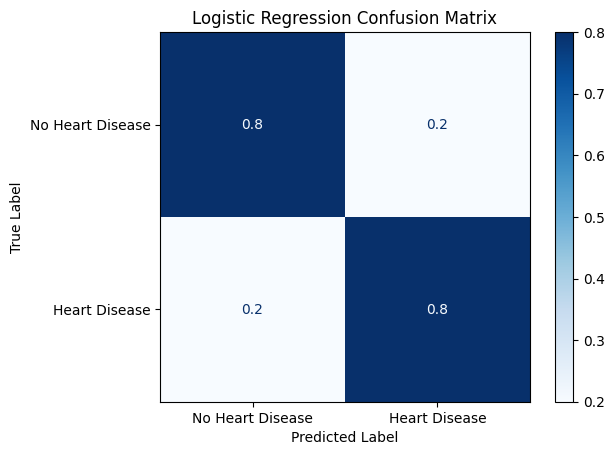

In [255]:
# logstic regression confusion
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    log_reg_pipeline,
    X_test,
    y_test,
    display_labels=["No Heart Disease", "Heart Disease"],
    cmap="Blues",
    normalize='true'
)

disp.ax_.set_title("Logistic Regression Confusion Matrix")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

plt.show()


In [256]:
# Explain Confusion Matrix For Logstic Regression
explain_confusion_matrix(
    log_reg_pipeline,
    X_test,
    y_test,
    model_name="Logistic Regression"
)


Logistic Regression – Confusion Matrix Interpretation Report

True Negatives (TN): 60
→ Patients correctly identified as NOT having heart disease.

False Positives (FP): 15
→ Healthy patients incorrectly predicted as having heart disease.

False Negatives (FN): 22
→ Patients with heart disease incorrectly predicted as healthy.
This is the most critical error in medical diagnosis.

True Positives (TP): 87
→ Patients correctly identified as having heart disease.

Total test samples evaluated: 184


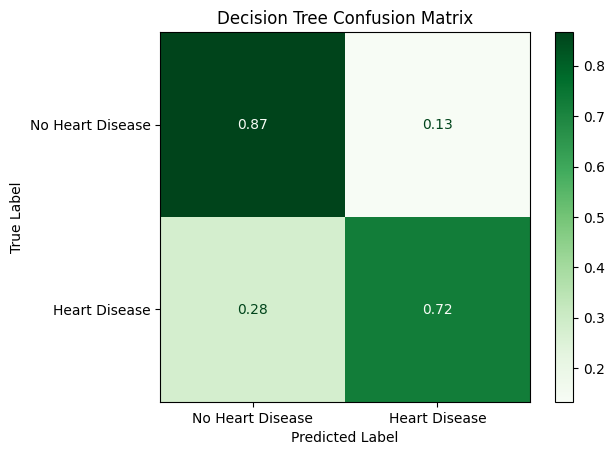

In [257]:
# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(
    tree_pipeline,
    X_test,
    y_test,
    display_labels=["No Heart Disease", "Heart Disease"],
    cmap="Greens",
    normalize="true"
)

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [258]:
# Explain Confusion Matrix For Decision Tree
explain_confusion_matrix(
    tree_pipeline,
    X_test,
    y_test,
    model_name="Decision Tree"
)



Decision Tree – Confusion Matrix Interpretation Report

True Negatives (TN): 65
→ Patients correctly identified as NOT having heart disease.

False Positives (FP): 10
→ Healthy patients incorrectly predicted as having heart disease.

False Negatives (FN): 30
→ Patients with heart disease incorrectly predicted as healthy.
This is the most critical error in medical diagnosis.

True Positives (TP): 79
→ Patients correctly identified as having heart disease.

Total test samples evaluated: 184


In [259]:
# Feature importance / coefficients
print("Feature importance / coefficients:")

# Logistic Regression coefficients
coeffs = pd.Series(log_reg_pipeline.named_steps['logistic'].coef_[0], index=X.columns)
print("Top positive risk factors (Logistic Regression):\n", coeffs.sort_values(ascending=False).head(5))

# Decision Tree feature importances
importances = pd.Series(tree_pipeline.named_steps['tree'].feature_importances_, index=X.columns)
print("\nTop features influencing the Decision Tree:\n", importances.sort_values(ascending=False).head(5))


Feature importance / coefficients:
Top positive risk factors (Logistic Regression):
 oldpeak       0.640769
sex_Male      0.585844
ca            0.532078
exang_True    0.442531
slope_flat    0.256521
dtype: float64

Top features influencing the Decision Tree:
 exang_True            0.355118
chol                  0.199558
ca                    0.095312
cp_atypical angina    0.090163
sex_Male              0.071100
dtype: float64


In [260]:
# Check missing values
assert Data.isnull().sum().sum() == 0, "There are still missing values!"

# Check target binary
assert set(Data_encoded['num'].unique()) <= {0,1}, "Target is not binary!"

# Check dummies
for col in ['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang']:
    assert col not in Data_encoded.columns, f"{col} not encoded!"

# Check training data only
assert 'X_test' not in log_reg_pipeline.named_steps['logistic'].__dict__, "Check: pipeline might have seen test data"


In [261]:
# Export trained models
joblib.dump(log_reg_pipeline, "logistic_regression_model.joblib")
joblib.dump(tree_pipeline, "decision_tree_model.joblib")

print("Models exported successfully!")


Models exported successfully!


##Conclusion

In this study, two machine learning models were trained to predict the presence of heart disease.

- Logistic Regression provided a stable baseline model with interpretable coefficients.
- Decision Tree slightly outperformed Logistic Regression by capturing non-linear relationships.

Both models were trained using pipelines to prevent data leakage and exported using `joblib` for deployment in a web application.
